In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

C:\Users\AkhouriAditya\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

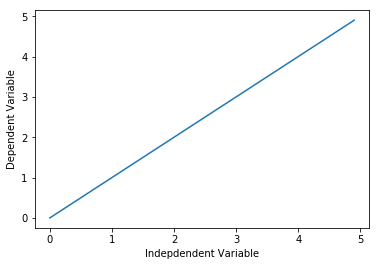

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 3 + 2

In [5]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
y_data

array([3.45844194, 3.42988838, 2.79834055, 2.80679714, 4.55842544,
       2.40300562, 3.35179667, 4.87417737, 4.19326491, 2.35489547,
       2.41847305, 3.52144973, 2.69856751, 3.9653616 , 3.40424117,
       3.71092211, 5.029537  , 4.85261986, 3.78043427, 4.1476461 ,
       2.53777005, 3.84396059, 3.99865388, 4.69331474, 3.16852652,
       3.10279683, 2.45287029, 2.76932747, 2.26006518, 2.61712043,
       4.44034601, 3.9407346 , 4.06150722, 2.33526816, 4.27106572,
       2.369948  , 3.53810785, 2.89517792, 2.8159937 , 5.03292773,
       2.61124581, 2.32482256, 3.5581189 , 2.98348896, 4.59419107,
       3.40771079, 3.61894531, 3.42135639, 4.94851952, 4.08699031,
       4.73052906, 4.88066408, 4.88512779, 4.15400805, 4.47566101,
       3.26726243, 4.18037397, 3.75338   , 4.6522427 , 4.57764287,
       2.71805341, 4.9020891 , 3.69659264, 2.71214984, 3.12835934,
       2.62793076, 3.49757856, 2.63510816, 4.23861157, 4.2759312 ,
       3.12412581, 2.21688838, 2.15094086, 4.92494831, 3.62570

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5840669, 3.026998]
5 [2.446085, 2.3117924]
10 [2.5855882, 2.2377646]
15 [2.6863015, 2.1834614]
20 [2.7592711, 2.1441185]
25 [2.8121393, 2.1156137]
30 [2.8504436, 2.0949614]
35 [2.878196, 2.0799983]
40 [2.8983033, 2.0691571]
45 [2.9128714, 2.0613024]
50 [2.9234264, 2.0556114]
55 [2.931074, 2.0514882]
60 [2.9366145, 2.048501]
65 [2.9406288, 2.0463364]
70 [2.9435372, 2.0447683]
75 [2.9456446, 2.043632]
80 [2.9471712, 2.042809]
85 [2.9482775, 2.0422127]
90 [2.949079, 2.0417805]
95 [2.9496596, 2.0414674]


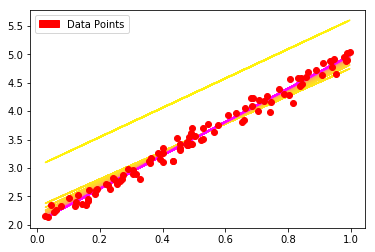

In [20]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [ ]:
dd = zip(x_data,y_data)
#print(dd[0:5])

In [13]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [15]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)